#1: Even-Odd Vending Machine

In [22]:
def factors(n):

  for i in range(n, n+18):
    if n % i == 0 and n % 2 == 0:
      print('Your number is even.')
      print(i)
      n += 2
    elif n % i == 0 and n % 2 != 0:
      print('Your number is odd.')
      print(i)
      n += 2

if __name__ == '__main__':
  n = input('Please enter a number: ')
  n = float(n)

  if n > 0 and n.is_integer():
    factors(int(n))
  else:
    print('Please enter a positive integer.')

Please enter a number: 43
Your number is odd.
43
Your number is odd.
45
Your number is odd.
47
Your number is odd.
49
Your number is odd.
51
Your number is odd.
53
Your number is odd.
55
Your number is odd.
57
Your number is odd.
59


#2: Exploring a Quadratic Function Visually

The graph is linear.

x=-3, y=[4]
x=-1, y=[4, 0]
x=2, y=[4, 0, 9]
x=3, y=[4, 0, 9, 16]
x=5, y=[4, 0, 9, 16, 36]
x=7, y=[4, 0, 9, 16, 36, 64]
x=8, y=[4, 0, 9, 16, 36, 64, 81]
x=12, y=[4, 0, 9, 16, 36, 64, 81, 169]
x=14, y=[4, 0, 9, 16, 36, 64, 81, 169, 225]
x=20, y=[4, 0, 9, 16, 36, 64, 81, 169, 225, 441]


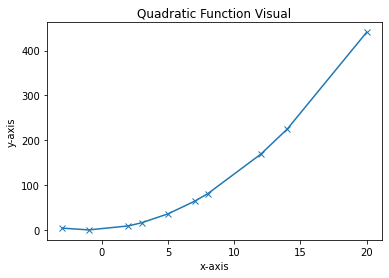

In [43]:
import matplotlib.pyplot as plt

x_values = [-3, -1, 2, 3, 5, 7, 8, 12, 14, 20]
y = []

for x in x_values:
  y.append(x**2 + 2*x + 1)
  print('x={0}, y={1}'.format(x, y))
  
plt.plot(x_values, y, marker = 'x')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Quadratic Function Visual');

#3: Statistics Calculator

In [63]:
from collections import Counter
import math

def stat_data(filename):
  
  numbers = []
  with open(filename) as f:
    for line in f:
      numbers.append(float(line))

    return numbers

def calc_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s/N
  return mean

def calc_med(numbers):
  N = len(numbers)
  numbers.sort()
  
  if n % 2 == 0:
    median1 = numbers[N//2]
    median2 = numbers[N//2 - 1]
    median = (median1 + median2)/2
  
  else:
    median = numbers[N//2]
  return median

def calc_mode(numbers):
  count = Counter(numbers)
  mode = count.most_common(1)
  return mode

def calc_var(numbers):
  N = len(numbers)
  mean = sum(numbers) / N
  deviation = [(x - mean) ** 2 for x in numbers]
  variance = sum(deviation) / N
  return variance

def calc_stdev(numbers):
  var = calc_var(numbers)
  std_dev = math.sqrt(var)
  return std_dev

if __name__ == '__main__':
  data = stat_data('mydata.txt')
  mean = calc_mean(data)
  median = calc_med(data)
  mode = calc_mode(data)
  variance = calc_var(data)
  stdev = calc_stdev(data)
  print('Mean: {0}'.format(mean))
  print('Median: {0}'.format(median))
  print('Mode: {0}'.format(mode))
  print('Variance: {0}'.format(variance))
  print('Standard Deviation: {0}'.format(stdev))

Mean: 160.91666666666666
Median: 35.0
Mode: [(23.0, 3)]
Variance: 38154.74305555556
Standard Deviation: 195.33239120933212


#4: Solving Single-Variable Inequalities

In [2]:
from sympy import Poly, Symbol, solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality, sympify

In [4]:
def solve(expr):
  if expr.is_polynomial():
    x = Symbol('x')
    lhs = expr.lhs
    p = Poly(lhs, x)
    rel = expr.rel_op
    solve_poly_inequality(p, rel)
  
  elif expr.is_rational_function():
    x = Symbol('x')
    lhs = expr.lhs
    numer, denom = lhs.as_numer_denom()
    p1 = Poly(numer)
    p2 = Poly(denom)
    rel = expr.rel_op
    solve_rational_inequalities([[((p1, p2), rel)]])
  
  else:
    expr.sympify()
    x = Symbol('x')
    solve_univariate_inequality(expr, x, relational=False)
    return 

expr = input()

TypeError: ignored

#5: Law of Large Numbers

In [78]:
from sympy import FiniteSet
import random

def find_prob(target_score, max_rolls):
  die_sides = FiniteSet(1, 2, 3, 4, 5, 6)
  s = die_sides**max_rolls
  if max_rolls > 1:
    success_rolls = []
    for elem in s:
      if sum(elem) >= target_score:
        success_rolls.append(elem)
  else:
    if target_score > 6:
      success_rolls = []
      for roll in die_sides:
        if roll >= target_score:
          success_rolls.append(roll)
  e = FiniteSet(*success_rolls)
  return len(e)/len(s)

target_score = 20
max_rolls = 500000
p = find_prob(target_score, max_rolls)
print('Probability: {0:.5f}'.format(p))

RecursionError: ignored

#6: Implement the Gradient Descent

In [ ]:
from sympy import Derivative, Symbol, sympify
def grad_desc(x, f1x, x0):
  epsilon = 1e-6
  step_size = 1e-4
  x_new = x0
  x_old = x_new + step_size*f1x.subs({x:x_new}).evalf()
  while abs(x_new - x_old) > epsilon:
    x_new = x_old
    x_old = x_new + step_size*f1x.subs({x:x_new}).evalf()
  return x_old
if __name__ == '__main__':
  f = input('Enter a function in one variable: ')
  var = input('Enter the variable to differentiate with respect to: ')
  var0 = float(input('Enter the initial value of the variable: '))
  try:
    f = sympify(f)
  except SympifyError:
    print('Invalid function entered')
  else:
    var = Symbol(var)
    d = Derivative(f, var).doit()
    var_min = grad_desc(var0, d, var)
    print('{0}: {1}'.format(var.name, var_min))
    print('Minimum value: {0}'.format(f.subs({var:var_min})))